Load in data

In [50]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

df = pd.read_csv('no_null_df.csv')

# Drop 'Unnamed: 0' index column

df = df.drop(columns=['Unnamed: 0'])

Separate String Variables that can't be used for Linear Regression. Separate target variable PPR/G 

In [51]:
# Separate String variables that can't be used for Linear Regression

string_variables = ['Player', 'Tm', 'Season', 'PosRank']
X_string_features = df[string_variables]

# Separate target variable PPR/G

y = df['PPR/G']

# Collect data for all variables being used in Linear Regression

X = df.drop(columns=string_variables)
X = X.drop(columns=['PPR/G'])

print(X.dtypes)

Age                         int64
PPR/G_prev                float64
avg_depth_of_target       float64
caught_percent            float64
grades_offense            float64
grades_pass_route         float64
route_rate                float64
slot_rate                 float64
wide_rate                 float64
inline_rate               float64
yprr                      float64
man_grades_pass_route     float64
zone_grades_pass_route    float64
grades_pass               float64
pbe                       float64
Pass Plays/G              float64
Receptions/G              float64
Routes/G                  float64
Targets/G                 float64
TD/G                      float64
YDS/G                     float64
YAC/G                     float64
RZ Targets/G              float64
P_Att/G                   float64
P_Cmp/G                   float64
P_TD/G                    float64
P_Yds/G                   float64
dtype: object


In [52]:
# Standardize data

scaler = StandardScaler()


X_standardized = scaler.fit_transform(X)
X_standardized = pd.DataFrame(X_standardized, columns=X.columns)
X_standardized





,Age,PPR/G_prev,avg_depth_of_target,caught_percent,grades_offense,grades_pass_route,route_rate,slot_rate,wide_rate,inline_rate,...,Routes/G,Targets/G,TD/G,YDS/G,YAC/G,RZ Targets/G,P_Att/G,P_Cmp/G,P_TD/G,P_Yds/G
0,0.160036,2.868833,-0.308807,0.790534,2.182752,2.176626,0.385479,-0.930086,0.894445,-0.168054,...,1.399084,2.401504,2.640779,2.656051,2.502699,3.592476,0.944951,1.245870,1.005714,1.917683
1,-0.196748,2.054698,0.255170,0.257142,2.045371,1.867484,0.605879,-1.089073,1.089069,-0.455448,...,1.324979,2.124270,0.685896,2.659090,2.341677,0.323080,1.291810,1.405908,0.335708,1.419558
2,1.587175,0.923637,0.226971,-0.322233,0.573426,0.312114,-0.275720,0.444938,-0.417148,-0.072255,...,1.127364,1.118284,1.706628,0.602985,0.360402,1.357430,-1.032148,-1.589093,-1.272307,-1.523407
3,-1.623888,0.531595,-0.055017,-0.064733,0.043526,-0.045331,-0.055320,-1.097667,1.118686,-0.455448,...,0.781538,1.053571,-0.261926,0.576177,0.141195,-0.250858,-0.008913,-0.720314,-1.406308,-1.422683
4,-1.267103,2.944006,0.226971,0.606606,2.143500,2.176626,0.385479,-0.745317,0.670205,-0.455448,...,1.374382,2.258107,3.529363,2.762425,2.671408,3.643721,0.858236,0.605717,0.603710,0.904951
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
996,2.300745,-0.286123,0.762749,-0.588929,-0.839641,-0.789203,0.936479,-1.033213,1.055221,-0.455448,...,0.398660,0.059351,-0.321165,-0.304705,-0.822371,0.210343,-0.071143,0.090636,0.241119,0.460258
997,0.873606,-1.256185,-1.746947,1.783748,-0.623756,-0.731239,0.385479,1.046512,-1.496039,8.645380,...,-1.604367,-1.447724,-0.930977,-1.286955,-0.900758,-1.336034,1.169389,1.166523,-1.272307,-0.668709
998,0.516821,-1.334269,-1.662350,1.020445,-1.261598,-1.320541,1.267078,-0.388670,0.420580,-0.455448,...,-1.276947,-1.342754,-1.209748,-1.360851,-1.232399,-0.660813,-1.703423,-1.695336,-1.020069,-1.678748
999,-0.196748,-1.394096,-2.198128,-0.515358,-1.457857,-1.079024,-0.992019,1.042215,-1.030635,0.502534,...,-1.507497,-1.342754,-1.209748,-1.383364,-0.924878,-0.934117,-0.315985,0.434920,0.367237,-0.137836


Find number of components to use for PCA

[3.98214616e-01 1.22309268e-01 1.02486416e-01 6.70126463e-02
 4.43559209e-02 4.15676645e-02 3.52087027e-02 3.15432419e-02
 2.91035692e-02 2.81419252e-02 1.87901890e-02 1.77063768e-02
 1.58458893e-02 1.25994424e-02 9.64418446e-03 7.75583056e-03
 4.91178055e-03 4.10576045e-03 3.01545063e-03 2.76109183e-03
 1.22230408e-03 8.68190796e-04 3.06982488e-04 2.72070302e-04
 2.11668225e-04 3.08052787e-05 8.01176398e-06]


Text(0, 0.5, 'Cumulative Explained Variance')

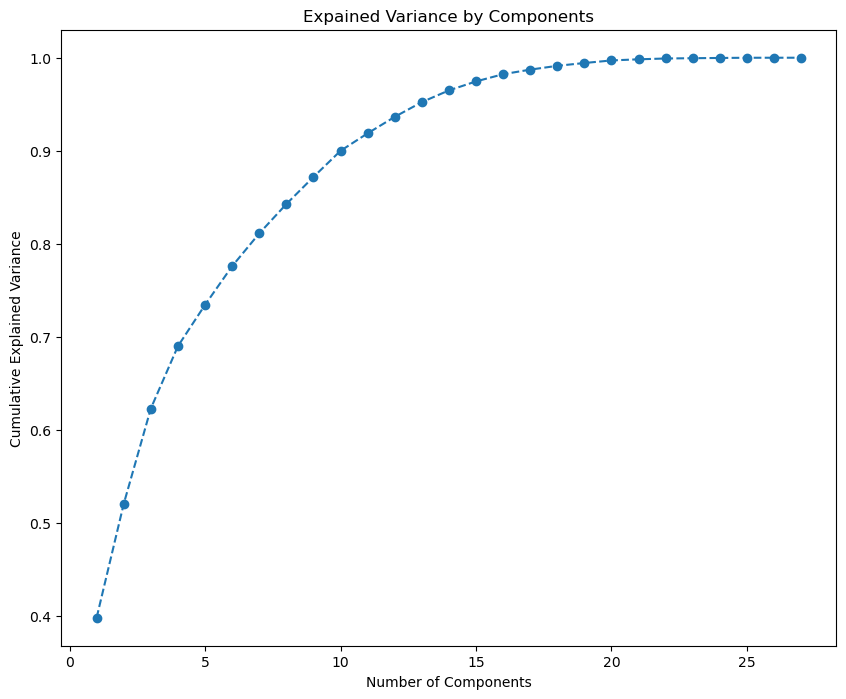

In [53]:
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.decomposition import PCA

# PCA

pca = PCA()
pca.fit(X_standardized)
print(pca.explained_variance_ratio_)

plt.figure(figsize=(10,8))
plt.plot(range(1,28), pca.explained_variance_ratio_.cumsum(), marker='o', linestyle='--')
plt.title('Expained Variance by Components')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')

Apply PCA with  number of chosen components

In [54]:
pca = PCA(n_components=7)
#X_standardized = pca.fit_transform(X_standardized)

Combine standardized data back with string data

In [55]:
# Combine back with df_string_features

#X_combined = pd.concat([X_standardized, X_string_features.reset_index(drop=True)], axis=1)

Perform Linear Regression

In [56]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_standardized, y, test_size=0.2, random_state=42)

# Initialize and train the Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R^2 Score: {r2}")

Mean Squared Error: 11.53827389322356
R^2 Score: 0.6630401617010593


Analyze Results

In [57]:
# Combine predictions with string features for further analysis
results_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
#results_with_strings = pd.concat([results_df, X_string_features.loc[X_test.index].reset_index(drop=True)], axis=1)

print(results_df)

# Get the coefficients (weights) and intercept
coefficients = model.coef_

# Create a DataFrame to display feature names and their corresponding coefficients
feature_names = X_standardized.columns
coefficients_df = pd.DataFrame({
    'Feature': feature_names,
    'Coefficient': coefficients
})

print(coefficients_df)

        Actual  Predicted
521   6.800000   6.313697
941   6.176471  11.124057
741   3.542857   5.098772
980   2.511111   4.122518
411   2.700000   2.996341
..         ...        ...
332  13.568750  15.501992
208  16.337500  12.644738
992   1.436364   2.855296
78    3.388889   6.259422
29   19.166667  14.042999

[201 rows x 2 columns]
                   Feature  Coefficient
0                      Age    -0.620083
1               PPR/G_prev     0.741687
2      avg_depth_of_target     0.013502
3           caught_percent    -0.256697
4           grades_offense    -1.512350
5        grades_pass_route     2.844687
6               route_rate     0.109216
7                slot_rate    -0.311258
8                wide_rate    -0.225327
9              inline_rate     0.104785
10                    yprr    -0.496305
11   man_grades_pass_route    -0.152096
12  zone_grades_pass_route    -0.464664
13             grades_pass     0.277483
14                     pbe     0.140150
15            Pass Plays